In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

%matplotlib inline

# Predicting the next character in a string using LSTMs

In this notebook we're going to create a recurrent neural net (RNN) for predicting the next character in a string of characters (i.e. text). This RNN will be able generate full texts, given only a few 'seed' characters to warm up, i.e.

```python
In [1]: seed = "Hel"
In [2]: model.predict(seed)
Out[2]: 'Hello, world!'
```

We split up our approach into the following tree easy-to-follow parts:

### **[<font color='blue'>Part 1</font>](#Part-1:-Control-flow-in-Tensorflow): Control flow in Tensorflow.**
### **[<font color='blue'>Part 2</font>](#Part-2:-Formatting-the-input-data): Formatting the input data.**
### **[<font color='blue'>Part 3</font>](#Part-3:-Build-the-RNN): Build the RNN.**


# <font color='blue'>**Part 1**</font>: Control flow in Tensorflow

In this notebook, we're going to use control flow operations, i.e. *if* statements and *while* loops. So before we tackle the bigger problem, let's learn how these control flow operations are implemented in Tensorflow.

## `if` statements in Tensorflow: `tf.cond`
Let's start Tensorflow's 'if' statement: **`tf.cond`** ('cond' stands for 'conditional execution')

In [ ]:
# clear previous computation graph
tf.reset_default_graph()

# some dummy data
x = tf.constant(7)
y = tf.constant(13)


max_xy = tf.cond(x >= y, lambda: x, lambda: y)


with tf.Session() as s:
    print s.run(max_xy)


***Note:*** *Also have a look at* **`tf.case`** *for more general switch statements.*

### <font color='green'>Exercise</font>
Write a function using **`tf.cond`** that takes a scalar and returns its modulus (without using **`tf.abs`**).


In [ ]:

# clear previous computation graph
tf.reset_default_graph()

# some test cases
x = tf.constant(...)
y = tf.constant(...)


def my_abs(x):
    '<your code here>'


with tf.Session() as s:
    '<your code here>'


In [ ]:
# %load sol/ex_cond_abs.py

## Traversing sequences in Tensorflow: `tf.map_fn` and `tf.while_loop`

Let's consider an array $x$, e.g.
```python
x = [0, 1, 2, 3]
```
There are essentially two distinct ways of traversing an array.

#### Type 1: map operations
The input for each iteration $i$ depends only on the component $x_i$. This is often called a **map** operation, which are trivially parallelizable (think of the map-reduce paradigm). In Tensorflow, this is implemented in **`tf.map_fn`**.

#### Type 2: loops
Here, the input for each consecutive iteration $i$ depends on the values computed in the previous iteration $i-1$. In other words, there is a definite notion of order of the sequence of operations. This kind of operation is implemented in Tensorflow in **`tf.while_loop`**.

In the following two exercises we're going to learn how to use these two operations.


![](img/map_fn.svg)

### <font color='green'>Exercise</font>
#### Use `tf.map_fn` to broadcasting unequal-sized tensors.

Now suppose we have the following two tensors:
```python
a = tf.ones([2, 3, 5])
b = tf.ones([7, 5])
```
and we would like compute the point-wise difference along the last axes (of length 5) in such a way that we get a rank-4 tensor of shape `[7, 2, 3, 5]`. In terms of components, this would be:
```python
c[i,j,k,l] = a[j,k,l] - b[i,l]
```
Now, the problem arises when we naively try:
```python
c = a - b
```
which raises an error saying:
```
Dimensions must be equal, but are 3 and 7 for 'sub' (op: 'Sub') with input shapes: [2,3,5], [7,5].
```
Now we do know that the broadcast works fine if we have a rank-1 tensor (vector) instead of a rank-2 tensor (matrix). In other words, if we select only one row of `b`, the broadcasting will work just fine, i.e.
```python
a - b[0]  # this works!
```
Using this information, come up with a way to calculate $c$ with **`tf.map_fn`**.

***Note:*** *The output tensor* `c` *must have shape* `(7, 2, 3, 5)`.

In [ ]:
tf.reset_default_graph()


a = tf.ones([2, 3, 5])
b = tf.ones([7, 5])

    
c = '<your code here>'

In [ ]:
# %load sol/ex_map_fn_broadcasting.py

![](img/while_loop.svg)

### <font color='green'>Exercise</font>

In this exercise, we're going to use **`tf.while_loop`** to compute the sum and the cumulative sum of an array of numbers:
```python
x = tf.constant([7, 0, 42, 1, 13, 4])
```

#### <font color='green'>A)</font> A simple while loop: *sum*.
Write a while loop that computes the sum of the entries of `x`.

In [ ]:
tf.reset_default_graph()

# input
x_len = 6
x = tf.constant([7, 0, 42, 1, 13, 4])


def cond(i, acc):
    '<your code here>'


def body(i, acc):
    '<your code here>'


# initial values for the loop variables
loop_vars = '<your code here>'

# compute loop
'<your code here>'


with tf.Session() as s:
    '<your code here>'

In [ ]:
# %load sol/ex_while_loop_sum.py

Now that we have the simple stuff out of the way, we're ready to tackle the slightly more involved case in which the accumulator isn't a scalar.

#### <font color='green'>B)</font> A slightly trickier while loop: *cumsum*.
In this part of the exercise, we'll build on our previous solution to calculate the cumulative sum ox `x`.

The main idea is the following. You start with an empty vector:
```python
y = tf.constant([], dtype=...)
```
Then, as you're computing the sum the way you did in part <font color='green'>**A**</font>, you keep appending each new entry to `y` with every iteration. To do the 'appending', you could use e.g. **`tf.concat`** in the following way:
```python
a = tf.constant([7, 1, 13])  # vector
b = tf.constant(11)          # scalar

# append scalar b to vector a
a = tf.concat([a, tf.expand_dims(b, axis=0)], axis=0)

```

Using these instructions, calculate the cumulative sum using **`tf.while_loop`**.



In [ ]:
tf.reset_default_graph()

# input
x_len = 6
x = tf.constant([7, 0, 42, 1, 13, 4])


def cond(i, acc, y):
    '<your code here>'


def body(i, acc, y):
    '<your code here>'


# initial values for the loop variables
loop_vars = '<your code here>'

# specify dynamic shape invariant for y
shape_invariants = '<your code here>'

# compute the loop
'<your code here>'


with tf.Session() as s:
    '<your code here>'

In [ ]:
# %load sol/ex_while_loop_cumsum.py

# <font color='blue'>**Part 2**</font>: Formatting the input data

Before we can start training we need to prepare our input data in a way that our model will understand it.

Since we're dealing with text, we need to turn the characters into numbers in order to perform our calculations on them. We do this in two steps: first we get the sparse (one-hot encoded) representation of each character and then we learn a dense representation (so-called embeddings) as part of our model training.

#### Sparse representation: *one-hot encoding*
Our sparse representation will consist of sparse vectors of dimension `n_chars`, which in our case is 129 (128 ascii chars + 1 end-of-sequence char). The feature vector for a single character will thus be of the form:

$\qquad x(\text{char})\ =\ (0, 0, 1, 0, \dots, 0)$

Or equivalently in components,

$\qquad x_i(\text{char})\ =\ \left\{\begin{matrix}1&\text{if } i = h(\text{char})\\0&\text{otherwise}\end{matrix}\right.$

where $h$ is a function that maps a character to an integer (e.g. a hash function). In our case, we use the build-in function [**`ord`**](https://docs.python.org/2/library/functions.html#ord):
```python
In [1]: ord('H')
Out[1]: 72
```
As it turns out, we don't actually need to construct the vector $x(\text{char})$ as displayed above. If you think about it, the only information that we need about $x$ is which component is switched on. In other words, the only information we need is $h(\text{char})$, in our case <font face='monospace'><font color='green'>ord</font>(char)</font>. So, the most efficient representation for our sparse feature vectors (single integers) turns out to be incredibly simple. For instance, the sparse representation of the phrase *"Hello, world!"* is simply:
```python
In [1]: x = [ord(char) for char in "Hello, world!"]
In [2]: x
Out[2]: [72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33]
```
Actually, we need to append an end-of-sequence (EOS) character to tell our model to stop generating more text. Let's set the index 0 aside for the EOS character, then we one-hot encode our phrase as follows:
```python
In [1]: x = [ord(char) + 1 for char in "Hello, world!"] + [0]
In [2]: x
Out[2]: [73, 102, 109, 109, 112, 45, 33, 120, 112, 115, 109, 101, 34, 0]
```
To go from a list of indices to a one-hot encoded vector in Tensorflow is super easy using **`tf.one_hot`**:
```python
n_chars = 129
x_indices = tf.constant([73, 102, 109, 109, 112])
x_one_hot = tf.one_hot(x_indices, n_chars)  # shape = (5, 129)

```

#### Dense representation: *embeddings*
If we only have a few input characters, we can use the one-hot encoded representation directly as our input. In reality, though, we know that text consists of a large number characters (in our case 129). In this case it's either infeasible or at best highly inefficient to use the sparse representation for our characters.

Moreover, the sparse representation has no notion of proximity between characters such as <font color='red' face='monospace'>'a'</font> and <font color='red' face='monospace'>'A'</font> or more subtly <font color='red' face='monospace'>'i'</font> and <font color='red' face='monospace'>'y'</font>.

A trick that we often use is to translate the high-dimensional sparse feature vectors to low-dimensional dense vectors. These dense vectors are called embeddings. Because the embeddings are low-dimensional, our model needs to learn far fewer weights. Of course, the model does need to learn the embeddings themselves, but this is a trade-off that does pay off. One of the interesting properties of embeddings is that the embedding for <font color='red' face='monospace'>'a'</font> and <font color='red' face='monospace'>'A'</font> are very similar, which means that the rest our network can focus on learning more abstract relations between characters.

Another point of view is that learning embeddings is kind of like having an automated pre-processing step included in the model. Pre-processing in such an end-to-end setting ensures optimal performance in the task that we're actually interested in.

An embedding matrix in Tensorflow must have the shape `(n_chars, emd_dim)`, where `n_chars` is the number of characters (or tokens) and `emb_dim` is the dimensionality of the dense embedding vector space. We typically initialize the embedding matrix randomly, e.g.
```python
n_chars = 129
emb_dim = 10
emb = tf.Variable(tf.random_uniform([n_chars, emb_dim]))
```
Then, in order to get the relevant embeddings we could use the one-hot encoded (sparse) representation `x_one_hot` (see above) as a mask:
```python
x_dense = tf.matmul(x_one_hot, emb)
```
There's a **more efficient** way of doing this, though. For this we use Tensorflow's embedding lookup function:
```python
x_dense = tf.nn.embedding_lookup(emb, x_indices)
```
The reason why this is more efficient is that avoid constructing `x_one_hot` explicitly (`x_indices` is enough).

In the training process, our model will learn an appropriate embedding matrix `emb` alongside the rest of the model parameters.

Below, we show a visual representation of the **character embeddings** as well as the mini-batched dense **input tensor**.

![](img/char_embeddings.svg)

![](img/rank3_input.svg)

In [14]:
%reload utils
from utils import SentenceEncoder

sents = ["Hello, world!", "Hi again!", "Bye bye now."]
enc = SentenceEncoder(sents, batch_size=2)


for seq, seqlen, seq_mask, max_seqlen in enc:
    print enc.decode(seq)
    print seqlen
    print seq
    print seq_mask.astype(int)
    print

module reloaded: utils
['Bye bye now.', 'Hi again!']
[13 10]
[[ 67 122 102  33  99 122 102  33 111 112 120  47   0]
 [ 73 106  33  98 104  98 106 111  34   0   0   0   0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0]]

['Hello, world!', 'Bye bye now.']
[14 13]
[[ 73 102 109 109 112  45  33 120 112 115 109 101  34   0]
 [ 67 122 102  33  99 122 102  33 111 112 120  47   0   0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0]]



### <font color='green'>Exercise</font>
In this exercise we're going to the functions that we just learned about to translate text into numeric input tensors.

#### <font color='green'>A)</font> A simple character encoder.

Using the examples above, write a simple encoder that takes the sentences
```python
sents = ['Hello, world!', 'Bye bye.']
```
and returns both the encoded sentences.

In [109]:
# input sentences
sents = ['Hello, world!', 'Bye bye.']

# this is the expected output
out = [[ 73, 102, 109, 109, 112,  45,  33, 120, 112, 115, 109, 101,  34,   0],
       [ 67, 122, 102,  33,  99, 122, 102,  47,   0,   0,   0,   0,   0,   0]]


def encoder(sents):
    '<your code here>'


print encoder(sents)
np.testing.assert_array_equal(out, encoder(sents))

Writing sol/ex_char_encoder.py


In [ ]:
# %load sol/ex_char_encoder.py

#### <font color='green'>B)</font> Get sparse representation.

Create a one-hot encoded (sparse) representation of the sentences that we encoded above.


In [ ]:
# clear any previous computation graphs
tf.reset_default_graph()

# dimensions
n_chars = '<your code here>'
batch_size = '<your code here>'
max_seqlen = '<your code here>'

# input placeholder
sents_enc = '<your code here>'

# sparse representation
x_one_hot = '<your code here>'

# input
sents = ['Hello, world!', 'Bye bye.']


with tf.Session() as s:
    '<your code here>'


In [ ]:
# %load sol/ex_one_hot.py

#### <font color='green'>C)</font> Get dense representation.

Same as the previous exercise, except now use an embedding matrix to create a **dense** representation of the sentences.

In [ ]:
# clear any previous computation graphs
tf.reset_default_graph()

# dimensions
n_chars = '<your code here>'
batch_size = '<your code here>'
emb_dim = '<your code here>'
max_seqlen = '<your code here>'

# input placeholder
sents_enc = '<your code here>'

# character embeddings
emb = '<your code here>'

# dense representation
x_dense = '<your code here>'

# input
sents = ['Hello, world!', 'Bye bye.']


with tf.Session() as s:
    '<your code here>'


In [ ]:
# %load sol/ex_embedding_lookup.py

# <font color='blue'>**Part 3**</font>: Build the RNN

Now that we all of the necessary ingredients, it's time to put the pieces together.

<font color='red'>**TODO:** Split up into smaller chunks and exercises.</font>

Epoch: 1, loss: 4.76753139496

Seed: "Hello"
Orig: Hello, world!
Pred: }}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}

Seed: "Hi ag"
Orig: Hi again!
Pred: }}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}

--------------------------------------------------------------------------------
Epoch: 2, loss: 4.49460506439

Seed: "Hello"
Orig: Hello, world!
Pred:       oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

Seed: "Hi ag"
Orig: Hi again!
Pred:        ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

--------------------------------------------------------------------------------
Epoch: 4, loss: 3.5093023777

Seed: "Good "
Orig: Good bye now.
Pred:   oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

Seed: "Hello"
Orig: Hello, world!
Pred:     

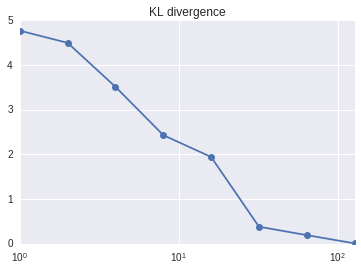

In [27]:
from utils import SentenceEncoder
from itertools import islice

# static shapes
n_hidden = 64
n_chars = 129  # ascii + EOS = 128 + 1 = 129
emb_dim = 13
batch_size = 2
warmup = 5

# clear any previous computation graph
tf.reset_default_graph()

# character embeddings
emb = tf.Variable(tf.random_uniform([n_chars, emb_dim], dtype=tf.float32))

# tf Graph input
seq_enc = tf.placeholder(tf.int32, [batch_size, None])  # (batch_size, max_seqlen_within_batch)
seq_mask = tf.placeholder(tf.bool, [batch_size, None])  # (batch_size, max_seqlen_within_batch)
max_seqlen = tf.placeholder(tf.int32, [])

# translate to dense vectors
x = tf.nn.embedding_lookup(emb, seq_enc)  # (batch_size, max_seqlen_within_batch, emb_dim])
x = tf.transpose(x, [1, 0, 2])            # tf.map_fn iterates over axis=0

# rnn cell
lstm_cell = tf.contrib.rnn.LSTMCell(n_hidden, num_proj=emb_dim, use_peepholes=True)

# memory cell states
c = tf.Variable(tf.random_uniform([1, n_hidden]))
m = tf.Variable(tf.random_uniform([1, emb_dim]))
c = tf.tile(c, [batch_size, 1])
m = tf.tile(m, [batch_size, 1])


def cond(i, h, c, m):
    return i < max_seqlen

def body(i, h, c, m):
    prev_token = tf.cond(
        i < warmup,
        lambda: x[i],
        lambda: tf.squeeze(h[-1])
    )
    
    h_new, (c, m) = lstm_cell(prev_token, (c, m))
    h_new = tf.expand_dims(h_new, 0)
    
    h = tf.concat([h, h_new], axis=0)
    i += 1
    return i, h, c, m


shape_invariants = map(tf.TensorShape, (
    [],                           # i.shape
    [None, batch_size, emb_dim],  # h.shape
    [batch_size, n_hidden],       # c.shape
    [batch_size, emb_dim],        # m.shape
))

# run while loop
h = tf.zeros([0, batch_size, emb_dim])
h = tf.while_loop(cond, body, [0, h, c, m], shape_invariants)[1]

# use Gaussian kernel for inter-embedding distances
d = tf.norm(tf.map_fn(lambda e: h - e, emb), axis=-1)  # shape = (n_chars, max_seqlen_within_batch, batch_size)
d = tf.transpose(d, [2, 1, 0])                         # shape = (batch_size, max_seqlen_within_batch, n_chars)

# define loss function
logits = -d ** 2                                         # shape = (batch_size, max_seqlen_within_batch, n_chars)
labels = tf.one_hot(seq_enc, n_chars, dtype=tf.float32)  # shape = (batch_size, max_seqlen_within_batch, n_chars)
loss = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
loss = tf.reduce_mean(tf.boolean_mask(loss, seq_mask))   # mask discards loss due to zero-padding

# get the most likely predicted characters
y_hat = tf.argmax(logits, axis=-1)  # shape = (batch_size, max_seqlen_within_batch)


   
def fit_model(sents, learning_rate=1e-2, n_epochs=128):
    """
    This function contains the usual boiler plate required to feed the
    input data and to print some training diagnostics.
    
    Params
    ------
    sents : sequence of strings
        The text on which to train / predict.
        
    learning_rate : float
        AdamOptimizer learning rate.
        
    n_epochs : int
        Numer of epochs to use at training time.
    
    """
    # optimizer
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    with tf.Session() as s:
        s.run(tf.global_variables_initializer())
        learning_curve = {}
        for epoch in xrange(1, n_epochs + 1):
            for seq_enc_, seqlen_, seq_mask_, max_seqlen_ in enc:
                _, loss_ = s.run(
                    (train, loss),
                    feed_dict={
                        seq_enc: seq_enc_,
                        seq_mask: seq_mask_,
                        max_seqlen: max_seqlen_})

            if np.log2(epoch).is_integer():
                print "Epoch: {}, loss: {}\n".format(epoch, loss_)
                learning_curve[epoch] = loss_

                # create prediction data
                seq_enc_ = list(enc)[0][0][:2]  # get just two sentences
                seqlen_ = 100
                seq_mask_ = np.zeros([batch_size, seqlen_], dtype=np.bool)
                seed = np.zeros([batch_size, seqlen_], dtype=np.int32)
                seed[:,:warmup] = seq_enc_[:,:warmup]
                y_hat_ = s.run(
                    y_hat,
                    feed_dict={
                        seq_enc: seed,
                        seq_mask: seq_mask_,
                        max_seqlen: seqlen_})

                for s1, s2 in zip(enc.decode(seq_enc_), enc.decode(y_hat_)):
                    print "Seed: \"{}\"".format(s1[:warmup])
                    print "Orig: {}".format(s1)
                    print "Pred: {}\n".format(s2)

                print "-" * 80

    learning_curve = pd.Series(learning_curve)
    learning_curve.plot(logx=True, style='o-', title='KL divergence')


# some simple input sentences
sents = ["Hello, world!", "Hi again!", "Good bye now."]

fit_model(sents)